# Network Characteristics
One of the goals of network analysis is to find mathematical models that characterize real-world networks and that can then be used to generate new networks with similar properties. In this problem, we will explore two famous models—Erd ̋os-R ́enyi and Small World—and compare them to real-world data from an academic collaboration network. Note that in this problem all networks are undirected. You may use the starter code in hw1-q1-starter.py for this problem.

• Erd ̋os-R ́enyi Random graph (G(n, m) random network): Generate a random instance of this model by using n = 5242 nodes and picking m = 14484 edges at random. Write code to construct instances of this model, i.e., do not call a SNAP function.

• Small-World Random Network: Generate an instance from this model as follows: begin with n = 5242 nodes arranged as a ring, i.e., imagine the nodes form a circle and each node is connected to its two direct neighbors (e.g., node 399 is connected to nodes 398 and 400), giving us 5242 edges. Next, connect each node to the neighbors of its neighbors (e.g., node 399 is also connected to nodes 397 and 401). This gives us another 5242 edges. Finally, randomly select 4000 pairs of nodes not yet connected and add an edge between them. In total, this will make m = 5242 · 2 + 4000 = 14484 edges. Write code to construct instances of this model, i.e., do not call a SNAP function.

• Real-World Collaboration Network: Download this undirected network from http://snap.stanford.edu/data/ca-GrQc.txt.gz. Nodes in this network represent authors of research papers on the arXiv in the General Relativity and Quantum Cosmology section. There is an edge between two authors if they have co-authored at least one paper together. Note that some edges may appear twice in the data, once for each direction. Ignoring repeats and self-edges, there are 5242 nodes and 14484 edges. (Note: Repeats are automatically ignored when loading an (un)directed graph with SNAP’s LoadEdgeList function).

## 1.1 Degree Distribution 
Generate a random graph from both the Erd ̋os-R ́enyi (i.e., G(n, m)) and Small-World models and read in the collaboration network. Delete all of the self-edges in the collaboration network (there should be 14,484 total edges remaining).
Plot the degree distribution of all three networks in the same plot on a log-log scale. In other words, generate a plot with the horizontal axis representing node degrees and the vertical axis representing the proportion of nodes with a given degree (by “log-log scale” we mean that both the horizontal and vertical axis must be in logarithmic scale). In one to two sentences, describe one key difference between the degree distribution of the collaboration network and the degree distributions of the random graph models.

## 1.2 Clustering Coefficient 
Recall that the local clustering coefficient for a node vi was defined in class as

􏰐 2|ei| Ci = ki·(ki−1)
ki ≥ 2
0 otherwise,

 where ki is the degree of node vi and ei is the number of edges between the neighbors of vi. The average clustering coefficient is defined as

C= 1 􏰊Ci. |V | i∈V

Compute and report the average clustering coefficient of the three networks. For this question, write your own implementation to compute the clustering coefficient, instead of using a built-in SNAP function.

Which network has the largest clustering coefficient? In one to two sentences, explain. Think about the underlying process that generated the network.


In [ ]:
pip install snap-stanford


In [ ]:
import snap
import numpy as np
import matplotlib.pyplot as plt

# Setup
erdosRenyi = None
smallWorld = None
collabNet = None

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Problem 1.1


In [ ]:
def genErdosRenyi(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges
    return type: snap.PUNGraph
    return: Erdos-Renyi graph with N nodes and E edges
    """
    ############################################################################
    # TODO: Your code here!

    Graph = snap.PUNGraph.New()
    for i in range(N):
      Graph.AddNode(i)
    
    current_num_edges = 0
    while current_num_edges < E:
      randi = np.random.randint(0,N)
      randj = np.random.randint(0,N)

      if not Graph.IsEdge(randi,randj):
        Graph.AddEdge(randi,randj)
        current_num_edges = current_num_edges + 1

    ############################################################################
    return Graph


In [ ]:
def genCircle(N=5242):
    """
    :param - N: number of nodes
    return type: snap.PUNGraph
    return: Circle graph with N nodes and N edges. Imagine the nodes form a
        circle and each node is connected to its two direct neighbors.
    """
    ############################################################################
    # TODO: Your code here!
    
    Graph = snap.PUNGraph.New()
    for i in range(N):
      Graph.AddNode(i)
    for i in range(N-1):
      Graph.AddEdge(i,(i+1))
    Graph.AddEdge(i,i+1)
    
    ############################################################################
    return Graph


In [ ]:
def connectNbrOfNbr(Graph, N=5242):
    """
    :param - Graph: snap.PUNGraph object representing a circle graph on N nodes
    :param - N: number of nodes
    return type: snap.PUNGraph
    return: Graph object with additional N edges added by connecting each node
        to the neighbors of its neighbors
    """
    ############################################################################
    # TODO: Your code here!

    for i in range(N):
      Graph.AddEdge(i,(i+2) % N)

    ############################################################################
    return Graph


In [ ]:
def connectRandomNodes(Graph, M=4000):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph
    :param - M: number of edges to be added
    return type: snap.PUNGraph
    return: Graph object with additional M edges added by connecting M randomly
        selected pairs of nodes not already connected.
    """
    ############################################################################
    # TODO: Your code here!

    N = Graph.GetNodes()
    num_edges_added = 0 
    while num_edges_added < M:
      randi = np.random.randint(0,N)
      randj = np.random.randint(0,N)

      if not Graph.IsEdge(randi,randj):
        Graph.AddEdge(randi,randj)
        num_edges_added = num_edges_added + 1

    ############################################################################
    return Graph

In [ ]:
def genSmallWorld(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges
    return type: snap.PUNGraph
    return: Small-World graph with N nodes and E edges
    """
    Graph = genCircle(N)
    Graph = connectNbrOfNbr(Graph, N)
    Graph = connectRandomNodes(Graph, 4000)
    #Graph = small_world_graph(N, E)
    return Graph


In [ ]:
def loadCollabNet(path):
    """
    :param - path: path to edge list file
    return type: snap.PUNGraph
    return: Graph loaded from edge list at `path and self edges removed
    Do not forget to remove the self edges!
    """
    ############################################################################
    # TODO: Your code here!
    Graph = snap.LoadEdgeList(snap.PUNGraph, path, 0, 1)
    for item in Graph.Edges():
      if item.GetSrcNId() == item.GetDstNId():
        Graph.DelEdge(item.GetSrcNId(),item.GetDstNId())
    ############################################################################
    return Graph


In [ ]:
def getDataPointsToPlot(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph
    return values:
    X: list of degrees
    Y: list of frequencies: Y[i] = fraction of nodes with degree X[i]
    """
    ############################################################################
    # TODO: Your code here!
    X, Y = [], []
    DegToCntV = snap.TIntPrV()
    snap.GetDegCnt(Graph,DegToCntV)
    for item in DegToCntV:
      X.append(item.GetVal1())
      Y.append(item.GetVal2())

    ############################################################################
    return X, Y


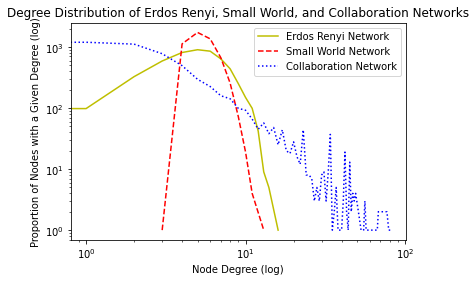

In [ ]:

global erdosRenyi, smallWorld, collabNet
erdosRenyi = genErdosRenyi(5242, 14484)
smallWorld = genSmallWorld(5242, 14484)
collabNet = loadCollabNet("/content/drive/MyDrive/ColabNotebooks/CA-GrQc.txt")

x_erdosRenyi, y_erdosRenyi = getDataPointsToPlot(erdosRenyi)
plt.loglog(x_erdosRenyi, y_erdosRenyi, color = 'y', label = 'Erdos Renyi Network')

x_smallWorld, y_smallWorld = getDataPointsToPlot(smallWorld)
plt.loglog(x_smallWorld, y_smallWorld, linestyle = 'dashed', color = 'r', label = 'Small World Network')

x_collabNet, y_collabNet = getDataPointsToPlot(collabNet)
plt.loglog(x_collabNet, y_collabNet, linestyle = 'dotted', color = 'b', label = 'Collaboration Network')

plt.xlabel('Node Degree (log)')
plt.ylabel('Proportion of Nodes with a Given Degree (log)')
plt.title('Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')
plt.legend()
plt.show()

## Problem 1.2 - Clustering Coefficient


In [ ]:
def calcClusteringCoefficientSingleNode(Node, Graph):
    """
    :param - Node: node from snap.PUNGraph object. Graph.Nodes() will give an
                   iterable of nodes in a graph
    :param - Graph: snap.PUNGraph object representing an undirected graph
    return type: float
    returns: local clustering coeffient of Node
    """
    ############################################################################
    # TODO: Your code here!
    C = 0.0

    ############################################################################
    return C

In [ ]:
def calcClusteringCoefficient(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph
    return type: float
    returns: clustering coeffient of Graph
    """
    ############################################################################
    # TODO: Your code here! If you filled out calcClusteringCoefficientSingleNode,
    #       you'll probably want to call it in a loop here
    C = 0.0

    ############################################################################
    return C

In [ ]:

C_erdosRenyi = calcClusteringCoefficient(erdosRenyi)
C_smallWorld = calcClusteringCoefficient(smallWorld)
C_collabNet = calcClusteringCoefficient(collabNet)

print('Clustering Coefficient for Erdos Renyi Network: %f' % C_erdosRenyi)
print('Clustering Coefficient for Small World Network: %f' % C_smallWorld)
print('Clustering Coefficient for Collaboration Network: %f' % C_collabNet)
